In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# (a) Load and apply PCA on the training data
train_data = pd.read_csv("nyt.train.csv")
test_data = pd.read_csv("nyt.test.csv")


In [2]:
# Separate labels and word counts
labels = train_data.iloc[:, 0]
data = train_data.iloc[:, 1:]

# Perform PCA on our actual training data
pca = PCA() 
pca.fit(data)
nyt_latent_sem = pca.components_.T #getting the latnet semantics

# Here we are displaying top 30 words with highest/lowest value components to be used below
def get_top_words(component, feature_names, top_n=30):
    sorted_indices = np.argsort(component)
    top_positive = [(feature_names[i], component[i]) for i in sorted_indices[-top_n:]]
    top_negative = [(feature_names[i], component[i]) for i in sorted_indices[:top_n]]
    return top_positive, top_negative


feature_names = data.columns

# taking the first component and getting our top 30 pos/neg words
top_positive_words, top_negative_words = get_top_words(nyt_latent_sem[:, 0], feature_names)

print("Top 30 words positively associated with Component 1:")
for word, weight in top_positive_words: #iterating through all the words
    print(f"{word}: {weight:.3f}")

print("\nTop 30 words negatively associated with Component 1:")
for word, weight in top_negative_words:
    print(f"{word}: {weight:.3f}")

# now taking the second component and getting our top 30 pos/neg words
top_positive_words_2, top_negative_words_2 = get_top_words(nyt_latent_sem[:, 1], feature_names)

print("\nTop 30 words positively associated with Component 2:")
for word, weight in top_positive_words_2: # same as above
    print(f"{word}: {weight:.3f}") 

print("\nTop 30 words negatively associated with Component 2:")
for word, weight in top_negative_words_2:
    print(f"{word}: {weight:.3f}")

Top 30 words positively associated with Component 1:
calif: 0.044
guitarist: 0.045
X.d: 0.047
purchase: 0.048
ballet: 0.048
recitals: 0.048
will: 0.049
yesterday: 0.049
events: 0.050
program: 0.051
hour: 0.051
dance: 0.052
organ: 0.053
east: 0.056
performances: 0.056
performance: 0.059
committee: 0.060
band: 0.061
orchestra: 0.062
p: 0.064
jersey: 0.064
musical: 0.065
sunday: 0.067
opera: 0.075
matinee: 0.077
composers: 0.078
theaters: 0.079
m: 0.080
music: 0.134
theater: 0.179

Top 30 words negatively associated with Component 1:
her: -0.150
she: -0.141
ms: -0.130
painting: -0.110
paintings: -0.103
mother: -0.092
cooper: -0.090
artists: -0.086
white: -0.078
images: -0.077
i: -0.071
said: -0.070
process: -0.070
sculpture: -0.070
picasso: -0.068
gagosian: -0.065
art: -0.064
my: -0.064
nature: -0.064
image: -0.061
color: -0.061
sculptures: -0.059
work: -0.059
red: -0.058
artist: -0.056
rothko: -0.055
paint: -0.055
photographs: -0.055
paper: -0.054
figure: -0.054

Top 30 words positively 

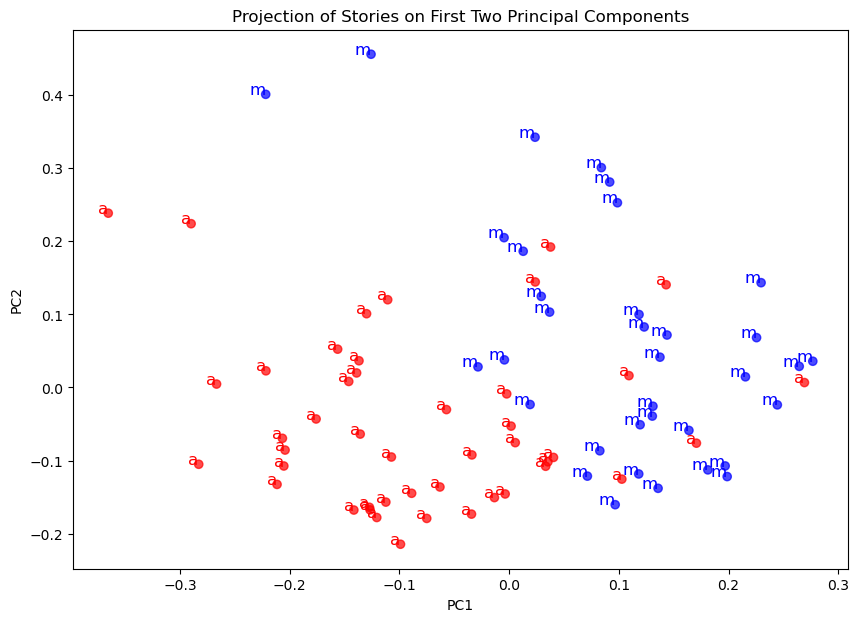

In [3]:
from sklearn.preprocessing import LabelEncoder

pca_data = pca.transform(data)  # Here we Project the data onto principal components

# Plot
plt.figure(figsize=(10, 7))
colors = ['red' if label == 'art' else 'blue' for label in labels] #splitting the data by colors so its easy to see
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=colors, alpha=0.7, label=labels)
for i, label in enumerate(labels):
    plt.text(pca_data[i, 0], pca_data[i, 1], 'a' if label == 'art' else 'm', # plotting
             color=colors[i], fontsize=12, ha='right') # we are all displaying letters for each word like display

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection of Stories on First Two Principal Components")
plt.show()

Training Error Rate: 0.225


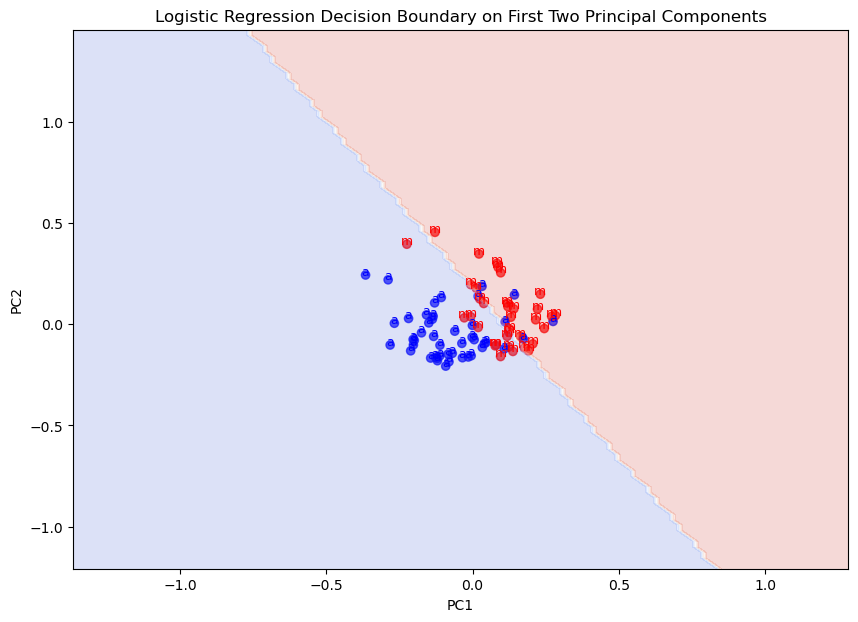

In [24]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encode labels as integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# same pca as earlier
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# here we are fitting the pca components with encoded labels as well
# log reg model being used
log_reg = LogisticRegression()
log_reg.fit(pca_data, encoded_labels) #encoded labels here

# creating predictions
predictions = log_reg.predict(pca_data)

# findoing the training error rate
error_rate = 1 - accuracy_score(encoded_labels, predictions)
print(f"Training Error Rate: {error_rate:.3f}")

# similiar plot as above plot
plt.figure(figsize=(10, 7))
colors = ['blue' if label == 'art' else 'red' for label in labels]
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=colors, alpha=0.7)
for i, label in enumerate(labels):
    plt.text(pca_data[i, 0], pca_data[i, 1], 'a' if label == 'art' else 'm', 
             color=colors[i], fontsize=9, ha='center')

# this utilizies code from previous projects to find the decision boundary
x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm) #coloring

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Logistic Regression Decision Boundary on First Two Principal Components")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

# getting my testing / training data organized
X_train = train_data.iloc[:, 1:].values 
y_train = train_data.iloc[:, 0].values  

# here i got my testing data
X_test = test_data.iloc[:, 1:].values  
y_test = test_data.iloc[:, 0].values 

#creating pca model here and training on the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

label_encoder = LabelEncoder()

# transforming art/music to binary
y_train_encoded = label_encoder.fit_transform(y_train)
#same for testing here
y_test_encoded = label_encoder.transform(y_test)

# Training log reg
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train_encoded)

# applying it on the actual testing data
X_test_pca = pca.transform(X_test)
# creating prediciont with x test data
y_pred_encoded = log_reg.predict(X_test_pca)

In [16]:
# Compute test error rate
test_error_rate = 1 - accuracy_score(y_test_encoded, y_pred_encoded)
print("Test Error Rate:", test_error_rate)

#  confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Computing out actual class specific error rates
class_0_error_rate = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])
class_1_error_rate = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])

print("Class 0 Error Rate:", class_0_error_rate)
print("Class 1 Error Rate:", class_1_error_rate)

Test Error Rate: 0.36363636363636365
Class 0 Error Rate: 0.0
Class 1 Error Rate: 0.8
